In [2]:
import anndata as ad

In [3]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/4238426645.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = ppmi_ad.obs.groupby('Gender')['Patient'].nunique()


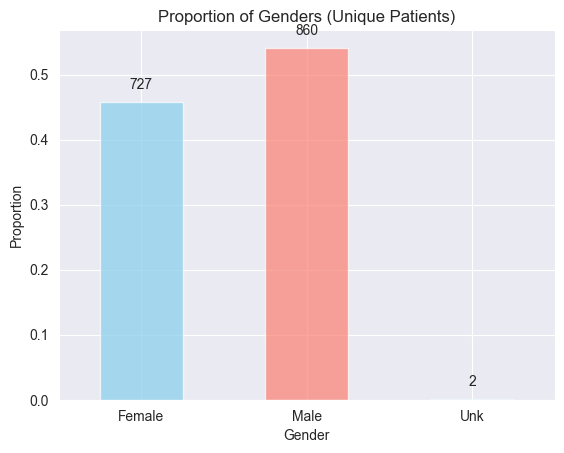

In [4]:
import matplotlib.pyplot as plt

gender_counts = ppmi_ad.obs.groupby('Gender')['Patient'].nunique()
total_patients = ppmi_ad.obs['Patient'].nunique()
gender_proportions = gender_counts / total_patients
gender_proportions.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)

# Annotate the plot with absolute numbers
for i, count in enumerate(gender_counts):
    plt.text(i, gender_proportions.iloc[i] + 0.02, f'{count}', ha='center', fontsize=10)

plt.title('Proportion of Genders (Unique Patients)')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/944239985.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_cohort_counts = ppmi_ad.obs.groupby(['Gender', 'Diagnosis'])['Patient'].nunique().unstack(fill_value=0)


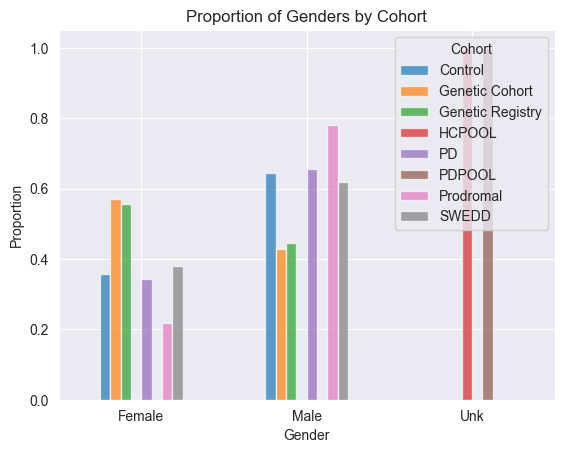

In [6]:
color_map = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']  # Example color map
gender_cohort_counts = ppmi_ad.obs.groupby(['Gender', 'Diagnosis'])['Patient'].nunique().unstack(fill_value=0)
gender_cohort_counts = gender_cohort_counts.div(gender_cohort_counts.sum(axis=0), axis=1)

gender_cohort_counts.plot(kind='bar', stacked=False, color=color_map, alpha=0.7)
plt.title('Proportion of Genders by Cohort')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Cohort')
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/3257530315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  samples_per_cohort = ppmi_ad.obs.groupby(['Diagnosis', 'Visit'])['Patient'].nunique().unstack(fill_value=0)


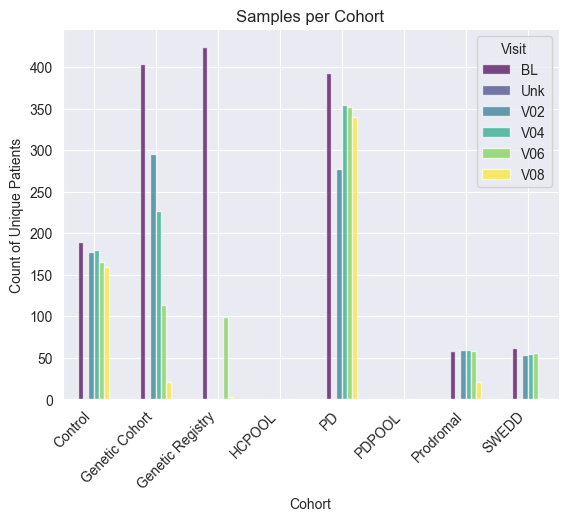

In [7]:
# Count unique patients per Diagnosis and Visit
samples_per_cohort = ppmi_ad.obs.groupby(['Diagnosis', 'Visit'])['Patient'].nunique().unstack(fill_value=0)
samples_per_cohort.plot(kind='bar', stacked=False, alpha=0.7, colormap='viridis')
plt.title('Samples per Cohort')
plt.ylabel('Count of Unique Patients')
plt.xlabel('Cohort')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Visit')
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_29865/3209609582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = ppmi_ad.obs.groupby(['Age_Group', 'Gender'])['Patient'].nunique().unstack(fill_value=0)


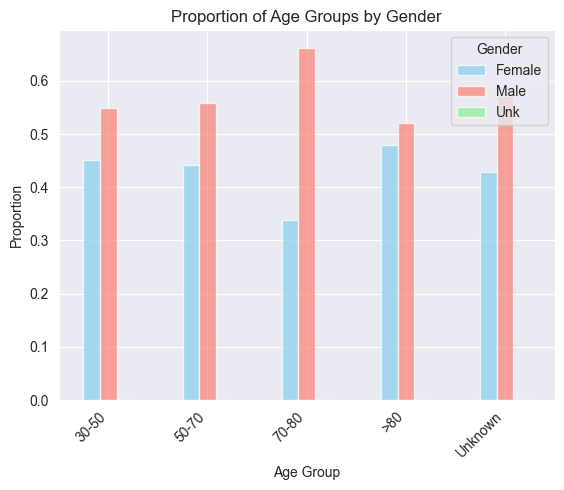

In [17]:
# Create a barplot for age groups per gender
age_gender_counts = ppmi_ad.obs.groupby(['Age_Group', 'Gender'])['Patient'].nunique().unstack(fill_value=0)
age_gender_counts = age_gender_counts.div(age_gender_counts.sum(axis=1), axis=0)

age_gender_counts.plot(kind='bar', stacked=False, color=color_map[:len(age_gender_counts.columns)], alpha=0.7)
plt.title('Proportion of Age Groups by Gender')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Gender')
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/3572932407.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group', 'Gender'])['Patient']


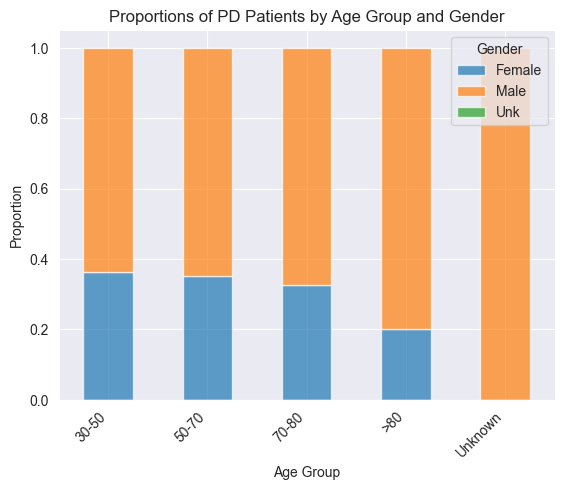

In [8]:
# Calculate the proportions of PD patients per age group and per gender
pd_age_gender_counts = (
    ppmi_ad.obs[ppmi_ad.obs['Diagnosis'] == 'PD']
    .groupby(['Age_Group', 'Gender'])['Patient']
    .nunique()
    .unstack(fill_value=0)
)
pd_age_gender_proportions = pd_age_gender_counts.div(pd_age_gender_counts.sum(axis=1), axis=0)

pd_age_gender_proportions.plot(
    kind='bar',
    stacked=True,
    color=color_map[:len(pd_age_gender_proportions.columns)],
    alpha=0.7
)
plt.title('Proportions of PD Patients by Age Group and Gender')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Gender')
plt.show()

In [9]:
# Identify patients belonging to more than one cohort
patients_multiple_cohorts = ppmi_ad.obs.groupby('Patient')['Diagnosis'].nunique()
patients_multiple_cohorts = patients_multiple_cohorts[patients_multiple_cohorts > 1]

print(f"Number of patients in more than one cohort: {len(patients_multiple_cohorts)}")
print(patients_multiple_cohorts)

Number of patients in more than one cohort: 0
Series([], Name: Diagnosis, dtype: int64)


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/3131751337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diagnosis_gender_counts = ppmi_ad.obs.groupby(['Gender', 'Diagnosis'])['Patient'].nunique().unstack(fill_value=0)


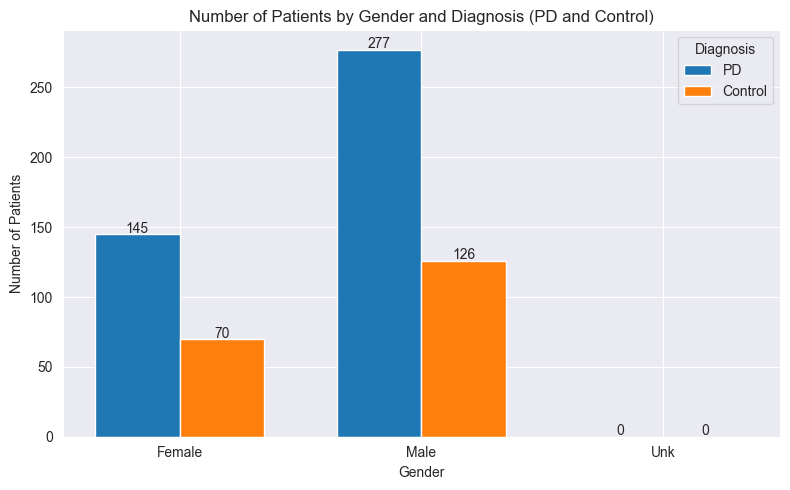

In [11]:
diagnosis_gender_counts = ppmi_ad.obs.groupby(['Gender', 'Diagnosis'])['Patient'].nunique().unstack(fill_value=0)

import matplotlib.pyplot as plt

# Filter only for "PD" and "Control" diagnoses
diagnosis_gender_filtered = diagnosis_gender_counts[['PD', 'Control']]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot
bar_width = 0.35
genders = diagnosis_gender_filtered.index
x = range(len(genders))

for i, diag in enumerate(diagnosis_gender_filtered.columns):
    ax.bar(
        [pos + i * bar_width for pos in x],
        diagnosis_gender_filtered[diag],
        width=bar_width,
        label=diag
    )

# Annotate the bars with absolute numbers
for i, (index, row) in enumerate(diagnosis_gender_filtered.iterrows()):
    for j, value in enumerate(row):
        ax.text(
            i + j * bar_width, value + 1,
            str(value),
            ha='center',
            fontsize=10
        )

# Add plot labels and title
ax.set_title('Number of Patients by Gender and Diagnosis (PD and Control)')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Patients')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(genders)
ax.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/2385457043.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group', 'Diagnosis'])['Patient']


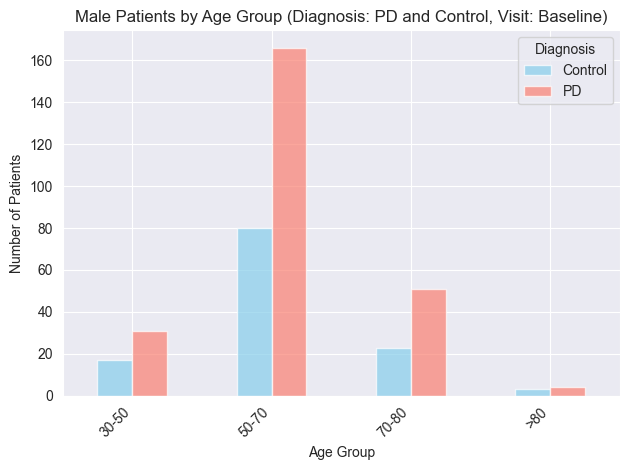

In [17]:
mask = ((ppmi_ad.obs['Gender'] == 'Male') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])) &
        (ppmi_ad.obs['Age_Group'] != 'Unknown') &
        (ppmi_ad.obs['Visit'] == 'BL'))

ppmi_ad_masked = ppmi_ad[mask]

baseline_age_counts = (
    ppmi_ad_masked.obs
    .groupby(['Age_Group', 'Diagnosis'])['Patient']
    .nunique()
    .unstack(fill_value=0)
)

baseline_age_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Male Patients by Age Group (Diagnosis: PD and Control, Visit: Baseline)')
plt.ylabel('Number of Patients')
plt.xlabel('Age Group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_4110/1375022942.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group', 'Diagnosis'])['Patient']


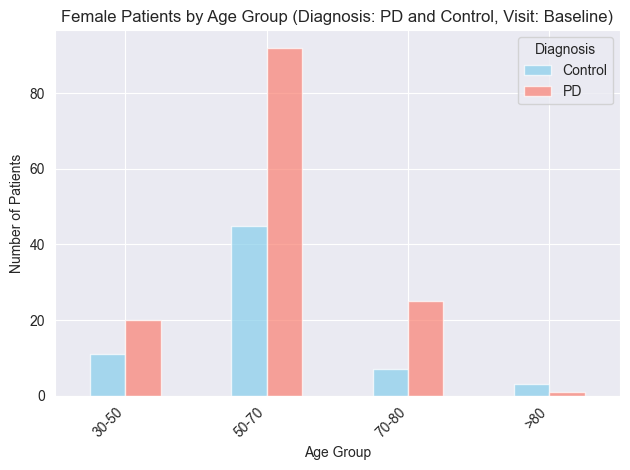

In [16]:
mask = ((ppmi_ad.obs['Gender'] == 'Female') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])) &
        (ppmi_ad.obs['Visit'] == 'BL'))

ppmi_ad_masked = ppmi_ad[mask]

baseline_age_counts = (
    ppmi_ad_masked.obs
    .groupby(['Age_Group', 'Diagnosis'])['Patient']
    .nunique()
    .unstack(fill_value=0)
)

baseline_age_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Female Patients by Age Group (Diagnosis: PD and Control, Visit: Baseline)')
plt.ylabel('Number of Patients')
plt.xlabel('Age Group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()